In [ ]:
# !git clone https://github.com/finterstellar/finterstellar.git

In [ ]:
# !pip uninstall matplotlib
# !pip install matplotlib==3.1.3

In [ ]:
# !pip uninstall scikit-learn

In [ ]:
# !pip install scikit-learn==0.23.2

In [ ]:
# !pip install -U finance-datareader
# !pip install yfinance

In [ ]:
# !pip install pycaret[full] -qqq

In [ ]:
# !pip install finterstellar

In [ ]:
# ta library
# https://technical-analysis-library-in-python.readthedocs.io/en/latest/

# !pip install ta

In [ ]:
from sklearn.cluster import KMeans
import warnings, random
warnings.filterwarnings(action='ignore')
from sklearn.preprocessing import StandardScaler

# 데이터 준비

In [ ]:
import FinanceDataReader as fdr

korean_list = fdr.StockListing('Krx')
korean_list

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
7926,000545,KOSPI,흥국화재우,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7927,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
7928,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시
7929,419890,KOSPI,히어로즈 단기채권ESG액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [ ]:
print(korean_list.loc[korean_list['Name'] == 'POSCO홀딩스'])

      Symbol Market      Name     Sector                  Industry  \
1793  005490  KOSPI  POSCO홀딩스  1차 철강 제조업  열연코일,냉연강판,후판,선재,스테인리스 제조   

     ListingDate SettleMonth            Representative  \
1793  1988-06-10         12월  대표이사 회장 최정우, 대표이사 사장 전중선   

                    HomePage Region  
1793  http://www.posco.co.kr  서울특별시  


In [ ]:
import yfinance as yf
# NAVER = 035420  
List= yf.download('035420.KS',
                      start='2018-06-01',
                       end = '2022-01-10',
                       action='inline',
                      progress=False)

In [ ]:
data = List

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-01,134800.0,137200.0,134400.0,136000.0,134985.296875,457305
2018-06-04,136200.0,137400.0,134200.0,134600.0,133595.734375,409355
2018-06-05,135600.0,136000.0,132800.0,134800.0,133794.250000,335760
2018-06-07,135000.0,136400.0,134800.0,136000.0,134985.296875,390905
2018-06-08,136000.0,141600.0,136000.0,140200.0,139153.968750,941455
...,...,...,...,...,...,...
2022-01-04,376000.0,376000.0,365000.0,365500.0,365500.000000,803676
2022-01-05,362000.0,362000.0,352000.0,355000.0,355000.000000,1151703
2022-01-06,348500.0,349500.0,337500.0,338500.0,338500.000000,1280916


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 889 entries, 2018-06-01 to 2022-01-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       889 non-null    float64
 1   High       889 non-null    float64
 2   Low        889 non-null    float64
 3   Close      889 non-null    float64
 4   Adj Close  889 non-null    float64
 5   Volume     889 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 48.6 KB


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-01,134800.0,137200.0,134400.0,136000.0,134985.296875,457305
2018-06-04,136200.0,137400.0,134200.0,134600.0,133595.734375,409355
2018-06-05,135600.0,136000.0,132800.0,134800.0,133794.250000,335760
2018-06-07,135000.0,136400.0,134800.0,136000.0,134985.296875,390905
2018-06-08,136000.0,141600.0,136000.0,140200.0,139153.968750,941455


In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-04,376000.0,376000.0,365000.0,365500.0,365500.0,803676
2022-01-05,362000.0,362000.0,352000.0,355000.0,355000.0,1151703
2022-01-06,348500.0,349500.0,337500.0,338500.0,338500.0,1280916
2022-01-07,338000.0,343500.0,337000.0,338000.0,338000.0,787839
2022-01-10,339000.0,339500.0,329000.0,335000.0,335000.0,828611


In [ ]:
# Close(종가)는 삭제하고 Adj Close(수정된 종가)를 사용
data.drop(columns = ['Close'], inplace = True)
data.rename(columns = {'Adj Close' : 'Close'}, inplace = True)
# chage(변화량), chage_rate(변화율) 추가
# 변화량
data['Change'] = [data.iloc[i]['Close']-data.iloc[i-1]['Close'] for i in range(len(data))]
# 변화율
data['Change_rate'] = [(data.iloc[i]['Close']-data.iloc[i-1]['Close'])/data.iloc[i-1]['Close']*100 for i in range(len(data))]
data

,Open,High,Low,Close,Volume,Change,Change_rate
Date,,,,,,,
2018-06-01,134800.0,137200.0,134400.0,134985.296875,457305,-200014.703125,-59.705882
2018-06-04,136200.0,137400.0,134200.0,133595.734375,409355,-1389.562500,-1.029418
2018-06-05,135600.0,136000.0,132800.0,133794.250000,335760,198.515625,0.148594
2018-06-07,135000.0,136400.0,134800.0,134985.296875,390905,1191.046875,0.890208
2018-06-08,136000.0,141600.0,136000.0,139153.968750,941455,4168.671875,3.088241
...,...,...,...,...,...,...,...
2022-01-04,376000.0,376000.0,365000.0,365500.000000,803676,-13000.000000,-3.434610
2022-01-05,362000.0,362000.0,352000.0,355000.000000,1151703,-10500.000000,-2.872777
2022-01-06,348500.0,349500.0,337500.0,338500.000000,1280916,-16500.000000,-4.647887


## 각종지수 feature로 추가

In [ ]:
import pandas as pd
import numpy as np
import ta

### 볼린저 밴드

In [ ]:
# 하이밴드
# ta.volatility.bollinger_hband(close, window=20, window_dev=2, fillna=False)
data['boll_HB'] = ta.volatility.bollinger_hband(data['Close'], window=20, window_dev=2, fillna=False)

In [ ]:
# ta.volatility.bollinger_hband_indicator(close, window=20, window_dev=2, fillna=False)
data['boll_HB_signal'] = ta.volatility.bollinger_hband_indicator(data['Close'], window=20, window_dev=2, fillna=False)

In [ ]:
# 로우밴드
# ta.volatility.bollinger_lband(close, window=20, window_dev=2, fillna=False)
data['boll_LB'] = ta.volatility.bollinger_lband(data['Close'], window=20, window_dev=2, fillna=False)

In [ ]:
# ta.volatility.bollinger_hband_indicator(close, window=20, window_dev=2, fillna=False)
data['boll_LB_signal'] = ta.volatility.bollinger_hband_indicator(data['Close'], window=20, window_dev=2, fillna=False)

### RSI

In [ ]:
# ta.momentum.rsi(close, window=14, fillna=False) → pandas.core.series.Series
data['rsi'] = ta.momentum.rsi(data['Close'])

In [ ]:
data['rsi']

Date
2018-06-01          NaN
2018-06-04          NaN
2018-06-05          NaN
2018-06-07          NaN
2018-06-08          NaN
                ...    
2022-01-04    33.678575
2022-01-05    28.803968
2022-01-06    23.136774
2022-01-07    22.989166
2022-01-10    22.078996
Name: rsi, Length: 889, dtype: float64

In [ ]:
# 30 이하 1 70이상 -1 그 외 0
def make_rissignal(value):
    if value <= 30: 
        return 1
    elif value <= 70:
        return 0
    else:
        return -1


In [ ]:
data['rsi_signal'] = data['rsi'].apply(lambda x : make_rissignal(x))

### 단순이동 평균

In [ ]:
# 단순 이동평균 SMA (Simple Moving Average)
data['sma5'] = data['Close'].rolling(5).mean()
data['sma20'] = data['Close'].rolling(20).mean()
data['sma60'] = data['Close'].rolling(60).mean()
data['sma120'] = data['Close'].rolling(120).mean()

### WMA 가중평균

In [ ]:
# WMA 가중평균
# ta.trend.wma_indicator(close, window=9, fillna=False)
data['WMA'] = ta.trend.wma_indicator(data['Close'], window=9, fillna=False)

### EMV 단순이동

In [ ]:
# EMV 단순이동
# ta.volume.ease_of_movement(high, low, volume, window=14, fillna=False)
data['EMV'] = ta.volume.ease_of_movement(data['High'], data['Low'], data['Volume'], window=14, fillna=False)

### macd

In [ ]:
# macd
# macd = ta.trend.macd(close) 12일 지수이동평균 - 26일 지수이동평균
# macdsignal = ta.trend.macd_signal(close) MACD의 9일 지수이동평균
# ta.trend.MACD(close: pandas.core.series.Series, 
# window_slow: int = 26, window_fast: int = 12, window_sign: int = 9, fillna: bool = False)
data['macd'] = ta.trend.macd(data['Close'])
data['macdsignal'] = ta.trend.macd_signal(data['Close'])

### 모멘텀

In [ ]:
# 모멘텀 awesome_oscillator
# ta.momentum.AwesomeOscillatorIndicator(high: pandas.core.series.Series, low: pandas.core.series.Series, window1: int = 5, window2: int = 34, fillna: bool = False)
data['awesome_oscillator'] = ta.momentum.awesome_oscillator(data['High'], data['Low'], 5, 34, False )

### williams_r

In [ ]:
# williams_r
# ta.momentum.williams_r(high, low, close, lbp=14, fillna=False)
data['williams_r'] = ta.momentum.williams_r(data['High'], data['Low'], data['Close'], lbp=14, fillna=False)

## 타겟설정

In [ ]:
# 등락률 : 어제보다 올랐으면 1 그밖은 0
data['upNdown']=[1 if x>0 else 0 for x in data['Change']]
#하루전 등락
data['upNdown_1ago']=data['upNdown'].shift(1)
#이틀전 등락
data['upNdown_2ago']=data['upNdown'].shift(2)

In [ ]:
data

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,sma120,WMA,EMV,macd,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-01,134800.0,137200.0,134400.0,134985.296875,457305,-200014.703125,-59.705882,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2018-06-04,136200.0,137400.0,134200.0,133595.734375,409355,-1389.562500,-1.029418,NaN,0.0,NaN,...,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,0,0.0,NaN
2018-06-05,135600.0,136000.0,132800.0,133794.250000,335760,198.515625,0.148594,NaN,0.0,NaN,...,NaN,NaN,-1.334286e+09,NaN,NaN,NaN,NaN,1,0.0,0.0
2018-06-07,135000.0,136400.0,134800.0,134985.296875,390905,1191.046875,0.890208,NaN,0.0,NaN,...,NaN,NaN,4.911679e+08,NaN,NaN,NaN,NaN,1,1.0,0.0
2018-06-08,136000.0,141600.0,136000.0,139153.968750,941455,4168.671875,3.088241,NaN,0.0,NaN,...,NaN,NaN,1.903437e+09,NaN,NaN,NaN,NaN,1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-04,376000.0,376000.0,365000.0,365500.000000,803676,-13000.000000,-3.434610,400653.122801,0.0,367873.980324,...,410258.191927,377607.836111,-1.163404e+10,-5712.496008,-5070.698955,-10847.058824,-98.360656,0,0.0,0.0
2022-01-05,362000.0,362000.0,352000.0,355000.000000,1151703,-10500.000000,-2.872777,402839.828155,0.0,362039.371845,...,409758.626823,372975.187500,-1.172177e+10,-7260.056068,-5508.570378,-14375.000000,-93.103448,0,0.0,0.0
2022-01-06,348500.0,349500.0,337500.0,338500.000000,1280916,-16500.000000,-4.647887,407451.390932,0.0,352229.774693,...,409096.595052,365475.908333,-1.264720e+10,-9706.035533,-6348.063409,-20282.352941,-98.275862,0,0.0,0.0


In [ ]:
# 내일의 등락률 즉 내일 예측을 위해 하루를 땅김
data['Target']=data['upNdown'].shift(-1)

In [ ]:
data

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,WMA,EMV,macd,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-01,134800.0,137200.0,134400.0,134985.296875,457305,-200014.703125,-59.705882,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0.0
2018-06-04,136200.0,137400.0,134200.0,133595.734375,409355,-1389.562500,-1.029418,NaN,0.0,NaN,...,NaN,0.000000e+00,NaN,NaN,NaN,NaN,0,0.0,NaN,1.0
2018-06-05,135600.0,136000.0,132800.0,133794.250000,335760,198.515625,0.148594,NaN,0.0,NaN,...,NaN,-1.334286e+09,NaN,NaN,NaN,NaN,1,0.0,0.0,1.0
2018-06-07,135000.0,136400.0,134800.0,134985.296875,390905,1191.046875,0.890208,NaN,0.0,NaN,...,NaN,4.911679e+08,NaN,NaN,NaN,NaN,1,1.0,0.0,1.0
2018-06-08,136000.0,141600.0,136000.0,139153.968750,941455,4168.671875,3.088241,NaN,0.0,NaN,...,NaN,1.903437e+09,NaN,NaN,NaN,NaN,1,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-04,376000.0,376000.0,365000.0,365500.000000,803676,-13000.000000,-3.434610,400653.122801,0.0,367873.980324,...,377607.836111,-1.163404e+10,-5712.496008,-5070.698955,-10847.058824,-98.360656,0,0.0,0.0,0.0
2022-01-05,362000.0,362000.0,352000.0,355000.000000,1151703,-10500.000000,-2.872777,402839.828155,0.0,362039.371845,...,372975.187500,-1.172177e+10,-7260.056068,-5508.570378,-14375.000000,-93.103448,0,0.0,0.0,0.0
2022-01-06,348500.0,349500.0,337500.0,338500.000000,1280916,-16500.000000,-4.647887,407451.390932,0.0,352229.774693,...,365475.908333,-1.264720e+10,-9706.035533,-6348.063409,-20282.352941,-98.275862,0,0.0,0.0,0.0


In [ ]:
# data=data.drop('upNdown',axis=1)
data = data.dropna()

In [ ]:
data=data[22:]

In [ ]:
data

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,WMA,EMV,macd,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,122500.0,123000.0,120500.0,121410.109375,322665,-497.585938,-0.408166,126988.043717,0.0,117488.887533,...,121718.311285,7.747974e+08,354.186448,597.710013,1402.941176,-64.453551,0,1.0,0.0,0.0
2019-01-02,121000.0,122000.0,117000.0,117429.453125,356120,-3980.656250,-3.278686,126763.854617,0.0,116900.403195,...,120784.503646,-3.159048e+09,-15.574880,475.053034,385.294118,-96.265625,0,0.0,1.0,1.0
2019-01-03,120000.0,125000.0,119000.0,121410.109375,525020,3980.656250,3.389828,126355.017945,0.0,116944.258617,...,120728.167361,2.857034e+09,12.448793,382.532186,51.470588,-61.651223,1,0.0,0.0,1.0
2019-01-04,123500.0,126000.0,122500.0,124893.195312,520785,3483.085938,2.868860,126666.244187,0.0,116864.494875,...,121361.329340,1.512140e+09,312.115805,368.448910,686.764706,-31.363519,1,1.0,0.0,1.0
2019-01-07,128000.0,132500.0,127000.0,130864.179688,502619,5970.984375,4.780872,128354.564154,1.0,115855.855377,...,123225.477778,6.018475e+09,1019.658618,498.690851,2023.529412,-10.553679,1,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,381000.0,382000.0,376000.0,378500.000000,369314,-3500.000000,-0.916230,401696.788580,0.0,370426.889545,...,380296.135417,-1.056012e+10,-4723.246681,-4910.249692,-9516.176471,-69.642857,0,0.0,1.0,0.0
2022-01-04,376000.0,376000.0,365000.0,365500.000000,803676,-13000.000000,-3.434610,400653.122801,0.0,367873.980324,...,377607.836111,-1.163404e+10,-5712.496008,-5070.698955,-10847.058824,-98.360656,0,0.0,0.0,0.0
2022-01-05,362000.0,362000.0,352000.0,355000.000000,1151703,-10500.000000,-2.872777,402839.828155,0.0,362039.371845,...,372975.187500,-1.172177e+10,-7260.056068,-5508.570378,-14375.000000,-93.103448,0,0.0,0.0,0.0


In [ ]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Change', 'Change_rate',
       'boll_HB', 'boll_HB_signal', 'boll_LB', 'boll_LB_signal', 'rsi',
       'rsi_signal', 'sma5', 'sma20', 'sma60', 'sma120', 'WMA', 'EMV', 'macd',
       'macdsignal', 'awesome_oscillator', 'williams_r', 'upNdown',
       'upNdown_1ago', 'upNdown_2ago', 'Target'],
      dtype='object')

## 클러스터링

In [ ]:
kmeans_data = data.drop(['upNdown','upNdown_1ago','upNdown_2ago',	'Target'], axis=1)
kmeans = KMeans(n_clusters=8, random_state=42).fit(kmeans_data)
data['cluster'] = kmeans.predict(kmeans_data)


# pycaret

In [ ]:
from pycaret.classification import * 

In [ ]:
# Importing module and initializing setup 

clf = setup(data = data, target='Target', train_size=0.8, silent=True, use_gpu =True)

,Description,Value
0,session_id,6336
1,Target,Target
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(745, 28)"
5,Missing Values,False
6,Numeric Features,21
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
# return best model based on AUC 
best = compare_models() #default is 'Accuracy' 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.5336,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.009
lr,Logistic Regression,0.5168,0.5301,0.4352,0.4736,0.4411,0.0234,0.0216,0.028
svm,SVM - Linear Kernel,0.5151,0.0000,0.4673,0.4816,0.4723,0.0246,0.0246,0.013
ridge,Ridge Classifier,0.5151,0.0000,0.3634,0.4787,0.4098,0.0118,0.0135,0.018
lda,Linear Discriminant Analysis,0.5101,0.5036,0.3598,0.4713,0.4052,0.0018,0.0030,0.023
qda,Quadratic Discriminant Analysis,0.5051,0.4985,0.5148,0.4845,0.4277,0.0128,0.0183,0.014
nb,Naive Bayes,0.5035,0.4341,0.1148,0.4237,0.1693,-0.0443,-0.0510,0.015
xgboost,Extreme Gradient Boosting,0.5019,0.4808,0.4683,0.4633,0.4641,-0.0010,-0.0013,0.298
catboost,CatBoost Classifier,0.4984,0.4758,0.4028,0.4620,0.4287,-0.0151,-0.0143,2.126
lightgbm,Light Gradient Boosting Machine,0.4951,0.4716,0.4249,0.4578,0.4392,-0.0186,-0.0187,0.086


In [ ]:
#lda, lr, catboost

## m1

In [ ]:
m1 = create_model('dummy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5333,0.5,0.0,0.0,0.0,0.0,0.0
1,0.5333,0.5,0.0,0.0,0.0,0.0,0.0
2,0.5333,0.5,0.0,0.0,0.0,0.0,0.0
3,0.5333,0.5,0.0,0.0,0.0,0.0,0.0
4,0.5333,0.5,0.0,0.0,0.0,0.0,0.0
5,0.5333,0.5,0.0,0.0,0.0,0.0,0.0
6,0.5424,0.5,0.0,0.0,0.0,0.0,0.0
7,0.5424,0.5,0.0,0.0,0.0,0.0,0.0
8,0.5254,0.5,0.0,0.0,0.0,0.0,0.0


In [ ]:
# tuned_m1 = tune_model(m1,choose_better = True)

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,08:38:54
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Dummy Classifier


,Fold,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


ValueError: ignored

In [ ]:
predict_model(m1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.4899,0.5,0.0,0.0,0.0,0.0,0.0


,Volume,Change,Change_rate,rsi,sma60,sma120,EMV,macd,macdsignal,awesome_oscillator,...,cluster,rsi_signal_-1,rsi_signal_0,rsi_signal_1,upNdown_0,upNdown_1ago_0.0,upNdown_2ago_1.0,Target,Label,Score
0,423258.0,-995.156250,-0.877185,45.237572,119262.218750,123800.531250,3.543938e+08,-2140.100586,-2442.384521,-4923.529297,...,0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.5336
1,704859.0,6482.078125,3.532610,58.853447,181336.671875,169352.703125,1.862074e+09,1692.279175,1337.050293,2872.058838,...,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.5336
2,297569.0,-4478.234375,-2.884611,47.183144,144945.765625,130246.351562,-3.024509e+09,1417.271729,2408.924805,1273.529419,...,7,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.5336
3,352863.0,1990.312500,1.423475,69.338753,119983.710938,122139.906250,-1.700377e+09,5838.226562,5733.459473,14007.352539,...,7,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.5336
4,304106.0,497.593750,0.323632,66.685181,133078.421875,125150.273438,-6.165613e+08,4454.076172,4443.104004,8197.058594,...,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.5336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,427402.0,498.625000,0.263854,61.704357,180496.140625,168285.578125,1.403831e+09,1684.990356,1036.585083,2819.117676,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5336
145,313910.0,995.171875,0.641030,63.339188,139464.062500,127687.945312,-4.778440e+08,3972.264160,4412.362305,7436.764648,...,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.5336
146,720472.0,-497.578125,-0.413220,42.489777,126327.890625,124034.203125,0.000000e+00,-1929.997925,-2252.341553,-4580.882324,...,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.5336
147,361765.0,-4494.031250,-1.250003,44.534027,374792.906250,346959.312500,-1.520324e+09,-7218.998535,-7878.297852,-19450.000000,...,7,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.5336


In [ ]:
final_m1 = finalize_model(m1)
print(final_m1)

DummyClassifier(constant=None, random_state=6336, strategy='prior')


In [ ]:
predict_model(final_m1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.4899,0.5,0.0,0.0,0.0,0.0,0.0


,Volume,Change,Change_rate,rsi,sma60,sma120,EMV,macd,macdsignal,awesome_oscillator,...,cluster,rsi_signal_-1,rsi_signal_0,rsi_signal_1,upNdown_0,upNdown_1ago_0.0,upNdown_2ago_1.0,Target,Label,Score
0,423258.0,-995.156250,-0.877185,45.237572,119262.218750,123800.531250,3.543938e+08,-2140.100586,-2442.384521,-4923.529297,...,0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.5248
1,704859.0,6482.078125,3.532610,58.853447,181336.671875,169352.703125,1.862074e+09,1692.279175,1337.050293,2872.058838,...,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.5248
2,297569.0,-4478.234375,-2.884611,47.183144,144945.765625,130246.351562,-3.024509e+09,1417.271729,2408.924805,1273.529419,...,7,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.5248
3,352863.0,1990.312500,1.423475,69.338753,119983.710938,122139.906250,-1.700377e+09,5838.226562,5733.459473,14007.352539,...,7,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.5248
4,304106.0,497.593750,0.323632,66.685181,133078.421875,125150.273438,-6.165613e+08,4454.076172,4443.104004,8197.058594,...,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.5248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,427402.0,498.625000,0.263854,61.704357,180496.140625,168285.578125,1.403831e+09,1684.990356,1036.585083,2819.117676,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5248
145,313910.0,995.171875,0.641030,63.339188,139464.062500,127687.945312,-4.778440e+08,3972.264160,4412.362305,7436.764648,...,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.5248
146,720472.0,-497.578125,-0.413220,42.489777,126327.890625,124034.203125,0.000000e+00,-1929.997925,-2252.341553,-4580.882324,...,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.5248
147,361765.0,-4494.031250,-1.250003,44.534027,374792.906250,346959.312500,-1.520324e+09,-7218.998535,-7878.297852,-19450.000000,...,7,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.5248


In [ ]:
m1_predictions = predict_model(final_m1, data=data)
m1_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.5248,0.5,0.0,0.0,0.0,0.0,0.0


,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target,cluster,Label,Score
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,122500.0,123000.0,120500.0,121410.109375,322665,-497.585938,-0.408166,126988.043717,0.0,117488.887533,...,597.710013,1402.941176,-64.453551,0,1.0,0.0,0.0,0,0.0,0.5248
2019-01-02,121000.0,122000.0,117000.0,117429.453125,356120,-3980.656250,-3.278686,126763.854617,0.0,116900.403195,...,475.053034,385.294118,-96.265625,0,0.0,1.0,1.0,7,0.0,0.5248
2019-01-03,120000.0,125000.0,119000.0,121410.109375,525020,3980.656250,3.389828,126355.017945,0.0,116944.258617,...,382.532186,51.470588,-61.651223,1,0.0,0.0,1.0,3,0.0,0.5248
2019-01-04,123500.0,126000.0,122500.0,124893.195312,520785,3483.085938,2.868860,126666.244187,0.0,116864.494875,...,368.448910,686.764706,-31.363519,1,1.0,0.0,1.0,0,0.0,0.5248
2019-01-07,128000.0,132500.0,127000.0,130864.179688,502619,5970.984375,4.780872,128354.564154,1.0,115855.855377,...,498.690851,2023.529412,-10.553679,1,1.0,1.0,0.0,1,0.0,0.5248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,381000.0,382000.0,376000.0,378500.000000,369314,-3500.000000,-0.916230,401696.788580,0.0,370426.889545,...,-4910.249692,-9516.176471,-69.642857,0,0.0,1.0,0.0,5,0.0,0.5248
2022-01-04,376000.0,376000.0,365000.0,365500.000000,803676,-13000.000000,-3.434610,400653.122801,0.0,367873.980324,...,-5070.698955,-10847.058824,-98.360656,0,0.0,0.0,0.0,5,0.0,0.5248
2022-01-05,362000.0,362000.0,352000.0,355000.000000,1151703,-10500.000000,-2.872777,402839.828155,0.0,362039.371845,...,-5508.570378,-14375.000000,-93.103448,0,0.0,0.0,0.0,5,0.0,0.5248


## m2

In [ ]:
m2 = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5500,0.5491,0.5357,0.5172,0.5263,0.0980,0.0981
1,0.5167,0.4799,0.5000,0.4828,0.4912,0.0312,0.0312
2,0.5167,0.5748,0.0714,0.4000,0.1212,-0.0235,-0.0403
3,0.6000,0.5781,0.6071,0.5667,0.5862,0.2000,0.2004
4,0.3500,0.4208,0.3214,0.3103,0.3158,-0.3029,-0.3031
5,0.5667,0.6127,0.4643,0.5417,0.5000,0.1216,0.1227
6,0.4746,0.4850,0.5556,0.4412,0.4918,-0.0374,-0.0385
7,0.4576,0.4988,0.2963,0.3810,0.3333,-0.1119,-0.1144
8,0.6271,0.5760,0.5714,0.6154,0.5926,0.2497,0.2503


In [ ]:
tuned_m2 = tune_model(m2,choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5500,0.5502,0.5714,0.5161,0.5424,0.1020,0.1025
1,0.5167,0.4810,0.5357,0.4839,0.5085,0.0355,0.0357
2,0.6000,0.6116,0.5714,0.5714,0.5714,0.1964,0.1964
3,0.6000,0.5781,0.6071,0.5667,0.5862,0.2000,0.2004
4,0.4333,0.4252,0.5714,0.4211,0.4848,-0.1135,-0.1202
5,0.5833,0.5882,0.8214,0.5349,0.6479,0.1901,0.2175
6,0.4407,0.4850,0.5556,0.4167,0.4762,-0.0981,-0.1029
7,0.4576,0.4977,0.2963,0.3810,0.3333,-0.1119,-0.1144
8,0.5932,0.5760,0.6429,0.5625,0.6000,0.1899,0.1917


In [ ]:
predict_model(tuned_m2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5906,0.5775,0.6447,0.5904,0.6164,0.1793,0.1801


,Volume,Change,Change_rate,rsi,sma60,sma120,EMV,macd,macdsignal,awesome_oscillator,...,cluster,rsi_signal_-1,rsi_signal_0,rsi_signal_1,upNdown_0,upNdown_1ago_0.0,upNdown_2ago_1.0,Target,Label,Score
0,423258.0,-995.156250,-0.877185,45.237572,119262.218750,123800.531250,3.543938e+08,-2140.100586,-2442.384521,-4923.529297,...,0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.5016
1,704859.0,6482.078125,3.532610,58.853447,181336.671875,169352.703125,1.862074e+09,1692.279175,1337.050293,2872.058838,...,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.5082
2,297569.0,-4478.234375,-2.884611,47.183144,144945.765625,130246.351562,-3.024509e+09,1417.271729,2408.924805,1273.529419,...,7,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.5133
3,352863.0,1990.312500,1.423475,69.338753,119983.710938,122139.906250,-1.700377e+09,5838.226562,5733.459473,14007.352539,...,7,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.5075
4,304106.0,497.593750,0.323632,66.685181,133078.421875,125150.273438,-6.165613e+08,4454.076172,4443.104004,8197.058594,...,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.5027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,427402.0,498.625000,0.263854,61.704357,180496.140625,168285.578125,1.403831e+09,1684.990356,1036.585083,2819.117676,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5062
145,313910.0,995.171875,0.641030,63.339188,139464.062500,127687.945312,-4.778440e+08,3972.264160,4412.362305,7436.764648,...,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.5021
146,720472.0,-497.578125,-0.413220,42.489777,126327.890625,124034.203125,0.000000e+00,-1929.997925,-2252.341553,-4580.882324,...,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.5000
147,361765.0,-4494.031250,-1.250003,44.534027,374792.906250,346959.312500,-1.520324e+09,-7218.998535,-7878.297852,-19450.000000,...,7,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.5067


In [ ]:
final_m2 = finalize_model(tuned_m2)
print(final_m2)

LogisticRegression(C=8.289, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6336, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
predict_model(final_m2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5973,0.5779,0.6316,0.6,0.6154,0.1934,0.1937


,Volume,Change,Change_rate,rsi,sma60,sma120,EMV,macd,macdsignal,awesome_oscillator,...,cluster,rsi_signal_-1,rsi_signal_0,rsi_signal_1,upNdown_0,upNdown_1ago_0.0,upNdown_2ago_1.0,Target,Label,Score
0,423258.0,-995.156250,-0.877185,45.237572,119262.218750,123800.531250,3.543938e+08,-2140.100586,-2442.384521,-4923.529297,...,0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.5016
1,704859.0,6482.078125,3.532610,58.853447,181336.671875,169352.703125,1.862074e+09,1692.279175,1337.050293,2872.058838,...,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.5086
2,297569.0,-4478.234375,-2.884611,47.183144,144945.765625,130246.351562,-3.024509e+09,1417.271729,2408.924805,1273.529419,...,7,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.5140
3,352863.0,1990.312500,1.423475,69.338753,119983.710938,122139.906250,-1.700377e+09,5838.226562,5733.459473,14007.352539,...,7,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.5078
4,304106.0,497.593750,0.323632,66.685181,133078.421875,125150.273438,-6.165613e+08,4454.076172,4443.104004,8197.058594,...,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.5028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,427402.0,498.625000,0.263854,61.704357,180496.140625,168285.578125,1.403831e+09,1684.990356,1036.585083,2819.117676,...,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5065
145,313910.0,995.171875,0.641030,63.339188,139464.062500,127687.945312,-4.778440e+08,3972.264160,4412.362305,7436.764648,...,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.5022
146,720472.0,-497.578125,-0.413220,42.489777,126327.890625,124034.203125,0.000000e+00,-1929.997925,-2252.341553,-4580.882324,...,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.5000
147,361765.0,-4494.031250,-1.250003,44.534027,374792.906250,346959.312500,-1.520324e+09,-7218.998535,-7878.297852,-19450.000000,...,7,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.5070


In [ ]:
m2_predictions = predict_model(final_m2, data=data)
m2_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5329,0.543,0.5226,0.5082,0.5153,0.0647,0.0647


,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target,cluster,Label,Score
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,122500.0,123000.0,120500.0,121410.109375,322665,-497.585938,-0.408166,126988.043717,0.0,117488.887533,...,597.710013,1402.941176,-64.453551,0,1.0,0.0,0.0,0,0.0,0.5036
2019-01-02,121000.0,122000.0,117000.0,117429.453125,356120,-3980.656250,-3.278686,126763.854617,0.0,116900.403195,...,475.053034,385.294118,-96.265625,0,0.0,1.0,1.0,7,1.0,0.5146
2019-01-03,120000.0,125000.0,119000.0,121410.109375,525020,3980.656250,3.389828,126355.017945,0.0,116944.258617,...,382.532186,51.470588,-61.651223,1,0.0,0.0,1.0,3,0.0,0.5132
2019-01-04,123500.0,126000.0,122500.0,124893.195312,520785,3483.085938,2.868860,126666.244187,0.0,116864.494875,...,368.448910,686.764706,-31.363519,1,1.0,0.0,1.0,0,0.0,0.5070
2019-01-07,128000.0,132500.0,127000.0,130864.179688,502619,5970.984375,4.780872,128354.564154,1.0,115855.855377,...,498.690851,2023.529412,-10.553679,1,1.0,1.0,0.0,1,0.0,0.5277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,381000.0,382000.0,376000.0,378500.000000,369314,-3500.000000,-0.916230,401696.788580,0.0,370426.889545,...,-4910.249692,-9516.176471,-69.642857,0,0.0,1.0,0.0,5,1.0,0.5486
2022-01-04,376000.0,376000.0,365000.0,365500.000000,803676,-13000.000000,-3.434610,400653.122801,0.0,367873.980324,...,-5070.698955,-10847.058824,-98.360656,0,0.0,0.0,0.0,5,1.0,0.5535
2022-01-05,362000.0,362000.0,352000.0,355000.000000,1151703,-10500.000000,-2.872777,402839.828155,0.0,362039.371845,...,-5508.570378,-14375.000000,-93.103448,0,0.0,0.0,0.0,5,1.0,0.5539


## m3

In [ ]:
m3 = create_model('svm' )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4500,0.0,0.4286,0.4138,0.4211,-0.1024,-0.1025
1,0.5167,0.0,0.5000,0.4828,0.4912,0.0312,0.0312
2,0.6000,0.0,0.5000,0.5833,0.5385,0.1892,0.1909
3,0.6000,0.0,0.6071,0.5667,0.5862,0.2000,0.2004
4,0.3500,0.0,0.3214,0.3103,0.3158,-0.3029,-0.3031
5,0.5667,0.0,0.4643,0.5417,0.5000,0.1216,0.1227
6,0.4746,0.0,0.5556,0.4412,0.4918,-0.0374,-0.0385
7,0.4576,0.0,0.2963,0.3810,0.3333,-0.1119,-0.1144
8,0.6271,0.0,0.5714,0.6154,0.5926,0.2497,0.2503


In [ ]:
tuned_m3 = tune_model(m3,choose_better = True  )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4500,0.0,0.4286,0.4138,0.4211,-0.1024,-0.1025
1,0.5167,0.0,0.5000,0.4828,0.4912,0.0312,0.0312
2,0.6000,0.0,0.5000,0.5833,0.5385,0.1892,0.1909
3,0.6000,0.0,0.6071,0.5667,0.5862,0.2000,0.2004
4,0.6500,0.0,0.6429,0.6207,0.6316,0.2984,0.2986
5,0.4167,0.0,0.5000,0.4000,0.4444,-0.1538,-0.1581
6,0.4746,0.0,0.5556,0.4412,0.4918,-0.0374,-0.0385
7,0.5254,0.0,0.6296,0.4857,0.5484,0.0656,0.0681
8,0.6271,0.0,0.5714,0.6154,0.5926,0.2497,0.2503


In [ ]:
predict_model(tuned_m3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.4094,0.4105,0.3553,0.4091,0.3803,-0.1785,-0.1801


,Volume,Change,Change_rate,rsi,sma60,sma120,EMV,macd,macdsignal,awesome_oscillator,williams_r,cluster,rsi_signal_-1,rsi_signal_0,rsi_signal_1,upNdown_0,upNdown_1ago_0.0,upNdown_2ago_1.0,Target,Label
0,423258.0,-995.156250,-0.877185,45.237572,119262.218750,123800.531250,3.543938e+08,-2140.100586,-2442.384521,-4923.529297,-39.174881,0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
1,704859.0,6482.078125,3.532610,58.853447,181336.671875,169352.703125,1.862074e+09,1692.279175,1337.050293,2872.058838,-13.866761,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,297569.0,-4478.234375,-2.884611,47.183144,144945.765625,130246.351562,-3.024509e+09,1417.271729,2408.924805,1273.529419,-80.282745,7,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
3,352863.0,1990.312500,1.423475,69.338753,119983.710938,122139.906250,-1.700377e+09,5838.226562,5733.459473,14007.352539,-15.945078,7,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,304106.0,497.593750,0.323632,66.685181,133078.421875,125150.273438,-6.165613e+08,4454.076172,4443.104004,8197.058594,-14.996250,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,427402.0,498.625000,0.263854,61.704357,180496.140625,168285.578125,1.403831e+09,1684.990356,1036.585083,2819.117676,-12.266478,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
145,313910.0,995.171875,0.641030,63.339188,139464.062500,127687.945312,-4.778440e+08,3972.264160,4412.362305,7436.764648,-29.628267,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
146,720472.0,-497.578125,-0.413220,42.489777,126327.890625,124034.203125,0.000000e+00,-1929.997925,-2252.341553,-4580.882324,-51.377213,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
147,361765.0,-4494.031250,-1.250003,44.534027,374792.906250,346959.312500,-1.520324e+09,-7218.998535,-7878.297852,-19450.000000,-42.979080,7,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


In [ ]:
final_m3 = finalize_model(tuned_m3)
print(final_m3)

SGDClassifier(alpha=0.0002, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.2, fit_intercept=True,
              l1_ratio=0.8700000001, learning_rate='constant', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1,
              penalty='elasticnet', power_t=0.5, random_state=6336,
              shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
              warm_start=False)


In [ ]:
predict_model(final_m3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.4094,0.4105,0.3553,0.4091,0.3803,-0.1785,-0.1801


,Volume,Change,Change_rate,rsi,sma60,sma120,EMV,macd,macdsignal,awesome_oscillator,williams_r,cluster,rsi_signal_-1,rsi_signal_0,rsi_signal_1,upNdown_0,upNdown_1ago_0.0,upNdown_2ago_1.0,Target,Label
0,423258.0,-995.156250,-0.877185,45.237572,119262.218750,123800.531250,3.543938e+08,-2140.100586,-2442.384521,-4923.529297,-39.174881,0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
1,704859.0,6482.078125,3.532610,58.853447,181336.671875,169352.703125,1.862074e+09,1692.279175,1337.050293,2872.058838,-13.866761,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,297569.0,-4478.234375,-2.884611,47.183144,144945.765625,130246.351562,-3.024509e+09,1417.271729,2408.924805,1273.529419,-80.282745,7,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
3,352863.0,1990.312500,1.423475,69.338753,119983.710938,122139.906250,-1.700377e+09,5838.226562,5733.459473,14007.352539,-15.945078,7,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,304106.0,497.593750,0.323632,66.685181,133078.421875,125150.273438,-6.165613e+08,4454.076172,4443.104004,8197.058594,-14.996250,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,427402.0,498.625000,0.263854,61.704357,180496.140625,168285.578125,1.403831e+09,1684.990356,1036.585083,2819.117676,-12.266478,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
145,313910.0,995.171875,0.641030,63.339188,139464.062500,127687.945312,-4.778440e+08,3972.264160,4412.362305,7436.764648,-29.628267,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
146,720472.0,-497.578125,-0.413220,42.489777,126327.890625,124034.203125,0.000000e+00,-1929.997925,-2252.341553,-4580.882324,-51.377213,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
147,361765.0,-4494.031250,-1.250003,44.534027,374792.906250,346959.312500,-1.520324e+09,-7218.998535,-7878.297852,-19450.000000,-42.979080,7,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


In [ ]:
m3_predictions = predict_model(final_m3, data=data)
m3_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.4644,0.464,0.4548,0.4387,0.4466,-0.0719,-0.072


,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,macd,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target,cluster,Label
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,122500.0,123000.0,120500.0,121410.109375,322665,-497.585938,-0.408166,126988.043717,0.0,117488.887533,...,354.186448,597.710013,1402.941176,-64.453551,0,1.0,0.0,0.0,0,1.0
2019-01-02,121000.0,122000.0,117000.0,117429.453125,356120,-3980.656250,-3.278686,126763.854617,0.0,116900.403195,...,-15.574880,475.053034,385.294118,-96.265625,0,0.0,1.0,1.0,7,0.0
2019-01-03,120000.0,125000.0,119000.0,121410.109375,525020,3980.656250,3.389828,126355.017945,0.0,116944.258617,...,12.448793,382.532186,51.470588,-61.651223,1,0.0,0.0,1.0,3,1.0
2019-01-04,123500.0,126000.0,122500.0,124893.195312,520785,3483.085938,2.868860,126666.244187,0.0,116864.494875,...,312.115805,368.448910,686.764706,-31.363519,1,1.0,0.0,1.0,0,1.0
2019-01-07,128000.0,132500.0,127000.0,130864.179688,502619,5970.984375,4.780872,128354.564154,1.0,115855.855377,...,1019.658618,498.690851,2023.529412,-10.553679,1,1.0,1.0,0.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,381000.0,382000.0,376000.0,378500.000000,369314,-3500.000000,-0.916230,401696.788580,0.0,370426.889545,...,-4723.246681,-4910.249692,-9516.176471,-69.642857,0,0.0,1.0,0.0,5,0.0
2022-01-04,376000.0,376000.0,365000.0,365500.000000,803676,-13000.000000,-3.434610,400653.122801,0.0,367873.980324,...,-5712.496008,-5070.698955,-10847.058824,-98.360656,0,0.0,0.0,0.0,5,0.0
2022-01-05,362000.0,362000.0,352000.0,355000.000000,1151703,-10500.000000,-2.872777,402839.828155,0.0,362039.371845,...,-7260.056068,-5508.570378,-14375.000000,-93.103448,0,0.0,0.0,0.0,5,0.0


# Backtesting

In [ ]:
import finterstellar as fs

In [ ]:
from finterstellar import util
from matplotlib.ticker import ScalarFormatter, FixedLocator
import matplotlib.pyplot as plt

In [ ]:
def draw_chart(df, left=None, right=None, log=False):
    '''
    Draw chart on each y-axis
    :param df: Dataframe that contains data to plot
    :param left: Columns to use left y-axis ticks
    :param right: Columns to use right y-axis ticks
    :param log: Plot in log scale
    :return: Line chart
    '''

    fig, ax1 = plt.subplots(figsize=(15,10))
    x = df.index
    
    if left is not None:
        left = util.str_to_list(left)
        i = 6
        for c in left:
            ax1.plot(x, df[c], label=c, color='C'+str(i), alpha=1)
            i += 1
        if log:
            ax1.set_yscale('log')
            ax1.yaxis.set_major_formatter(ScalarFormatter())
            ax1.yaxis.set_minor_formatter(ScalarFormatter())
    else:
        ax1.axes.yaxis.set_visible(False)
    # secondary y
    if right is not None:
        right = util.str_to_list(right)
        ax2 = ax1.twinx()
        i = 1
        for c in right:
            ax2.plot(x, df[c], label=c+'(R)', color='C'+str(i), alpha=1)
            ax1.plot(np.nan, label=c+'(R)', color='C'+str(i))
            i += 1
        ax1.grid(False, axis='y')
        if log:
            ax2.set_yscale('log')
            ax2.yaxis.set_major_formatter(ScalarFormatter())
            ax2.yaxis.set_minor_formatter(ScalarFormatter())
    ax1.legend(loc=2)
    # plt.setp(ax1.xaxis.get

## m1


In [ ]:
m1_predictions['Label'] = m1_predictions['Label'].astype(float)

In [ ]:
m1_predictions.describe()

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target,cluster,Label,Score
count,745.000000,745.000000,745.000000,745.000000,7.450000e+02,745.000000,745.000000,745.000000,745.000000,745.000000,...,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.0,7.450000e+02
mean,258886.577181,262618.120805,255161.073826,258202.395375,7.069085e+05,290.056785,0.161369,271649.217036,0.079195,238415.891574,...,2534.206293,5078.778129,-48.524172,0.475168,0.476510,0.475168,0.475168,2.511409,0.0,5.248000e-01
std,110425.850698,111610.206430,108929.771516,110107.646171,4.318606e+05,5914.236154,2.222680,116321.792637,0.270224,104267.900627,...,5875.050426,15649.742754,28.856411,0.499718,0.499783,0.499718,0.499718,2.621292,0.0,8.887751e-15
min,109000.000000,110000.000000,106500.000000,107975.390625,1.514790e+05,-34953.468750,-7.874012,114545.174333,0.000000,105192.832148,...,-11294.492179,-34388.235294,-107.703854,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,5.248000e-01
25%,152000.000000,155500.000000,150500.000000,152260.218750,4.121000e+05,-2985.484375,-1.112876,159303.340142,0.000000,140444.055591,...,-1738.927781,-4791.176471,-75.374823,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,5.248000e-01
50%,274000.000000,279500.000000,270500.000000,275238.843750,5.691620e+05,0.000000,0.000000,290226.445934,0.000000,229729.654696,...,1496.691426,3458.823529,-44.348235,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,5.248000e-01
75%,373000.000000,378500.000000,368000.000000,371505.625000,9.075070e+05,2985.500000,1.273886,398206.260875,0.000000,342811.854830,...,5418.209267,12258.823529,-23.378229,1.000000,1.000000,1.000000,1.000000,4.000000,0.0,5.248000e-01
max,460000.000000,465000.000000,452000.000000,453396.625000,3.303950e+06,32456.812500,13.924050,462693.098960,1.000000,426627.764037,...,19096.461388,54120.588235,-1.295801,1.000000,1.000000,1.000000,1.000000,7.000000,0.0,5.248000e-01


In [ ]:
#label 1일때 사고 0일 때 팔고
fs.indicator_to_signal(m1_predictions,factor='Label', buy=0.5, sell=0.5)

Date
2018-12-28    zero
2019-01-02    zero
2019-01-03    zero
2019-01-04    zero
2019-01-07    zero
              ... 
2021-12-30    zero
2022-01-04    zero
2022-01-05    zero
2022-01-06    zero
2022-01-07    zero
Name: trade, Length: 745, dtype: object

In [ ]:
fs.position(m1_predictions)

Date
2018-12-28      
2019-01-02    zz
2019-01-03    zz
2019-01-04    zz
2019-01-07    zz
              ..
2021-12-30    zz
2022-01-04    zz
2022-01-05    zz
2022-01-06    zz
2022-01-07    zz
Name: position, Length: 745, dtype: object

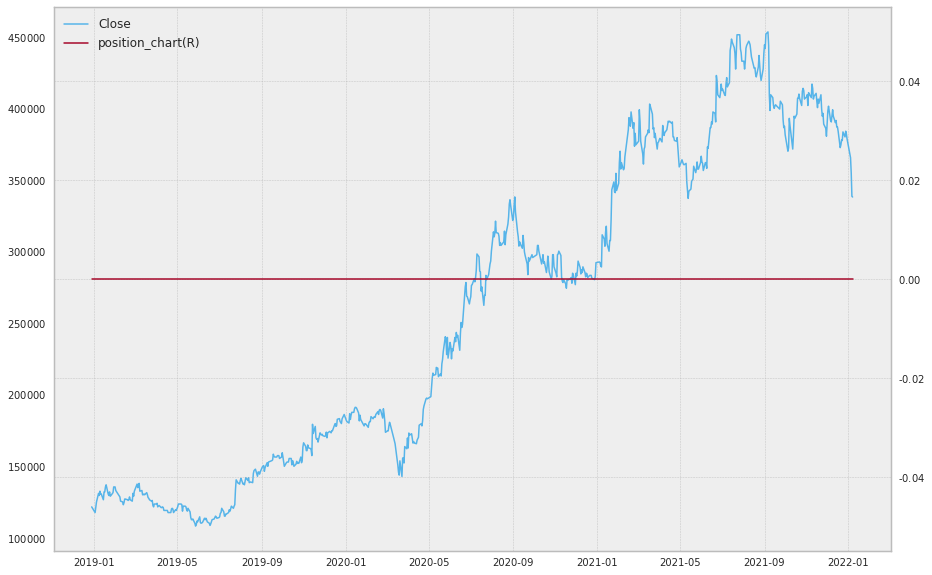

In [ ]:
draw_chart(m1_predictions, left=['Close'], right='position_chart')

In [ ]:
# 거래비용
fs.evaluate(m1_predictions, cost=0.0023)

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,122500.0,123000.0,120500.0,121410.109375,322665,-497.585938,-0.408166,126988.043717,0.0,117488.887533,...,0.5248,zero,,0,1.0,1,1,0,1.0,1.0000
2019-01-02,121000.0,122000.0,117000.0,117429.453125,356120,-3980.656250,-3.278686,126763.854617,0.0,116900.403195,...,0.5248,zero,zz,0,1.0,1,1,0,1.0,0.9878
2019-01-03,120000.0,125000.0,119000.0,121410.109375,525020,3980.656250,3.389828,126355.017945,0.0,116944.258617,...,0.5248,zero,zz,0,1.0,1,1,0,1.0,0.9796
2019-01-04,123500.0,126000.0,122500.0,124893.195312,520785,3483.085938,2.868860,126666.244187,0.0,116864.494875,...,0.5248,zero,zz,0,1.0,1,1,0,1.0,1.0000
2019-01-07,128000.0,132500.0,127000.0,130864.179688,502619,5970.984375,4.780872,128354.564154,1.0,115855.855377,...,0.5248,zero,zz,0,1.0,1,1,0,1.0,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,381000.0,382000.0,376000.0,378500.000000,369314,-3500.000000,-0.916230,401696.788580,0.0,370426.889545,...,0.5248,zero,zz,0,1.0,1,1,0,1.0,0.8283
2022-01-04,376000.0,376000.0,365000.0,365500.000000,803676,-13000.000000,-3.434610,400653.122801,0.0,367873.980324,...,0.5248,zero,zz,0,1.0,1,1,0,1.0,0.8174
2022-01-05,362000.0,362000.0,352000.0,355000.000000,1151703,-10500.000000,-2.872777,402839.828155,0.0,362039.371845,...,0.5248,zero,zz,0,1.0,1,1,0,1.0,0.7870


In [ ]:
# 무위험 수익률
fs.performance(m1_predictions, rf_rate=0.02)

CAGR: 0.00%
Accumulated return: 0.00%
Average return: nan%
Benchmark return : 175.92%
Number of trades: 0
Number of win: 0
Hit ratio: 0.00%
Investment period: 3.0yrs
Sharpe ratio: 0.00
MDD: 0.00%
Benchmark MDD: -26.52%


## m2

In [ ]:
m2_predictions['Label'] = m2_predictions['Label'].astype(float)

In [ ]:
m2_predictions.describe()

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target,cluster,Label,Score
count,745.000000,745.000000,745.000000,745.000000,7.450000e+02,745.000000,745.000000,745.000000,745.000000,745.000000,...,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,258886.577181,262618.120805,255161.073826,258202.395375,7.069085e+05,290.056785,0.161369,271649.217036,0.079195,238415.891574,...,2534.206293,5078.778129,-48.524172,0.475168,0.476510,0.475168,0.475168,2.511409,0.488591,0.518230
std,110425.850698,111610.206430,108929.771516,110107.646171,4.318606e+05,5914.236154,2.222680,116321.792637,0.270224,104267.900627,...,5875.050426,15649.742754,28.856411,0.499718,0.499783,0.499718,0.499718,2.621292,0.500206,0.020368
min,109000.000000,110000.000000,106500.000000,107975.390625,1.514790e+05,-34953.468750,-7.874012,114545.174333,0.000000,105192.832148,...,-11294.492179,-34388.235294,-107.703854,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
25%,152000.000000,155500.000000,150500.000000,152260.218750,4.121000e+05,-2985.484375,-1.112876,159303.340142,0.000000,140444.055591,...,-1738.927781,-4791.176471,-75.374823,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.504000
50%,274000.000000,279500.000000,270500.000000,275238.843750,5.691620e+05,0.000000,0.000000,290226.445934,0.000000,229729.654696,...,1496.691426,3458.823529,-44.348235,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.511200
75%,373000.000000,378500.000000,368000.000000,371505.625000,9.075070e+05,2985.500000,1.273886,398206.260875,0.000000,342811.854830,...,5418.209267,12258.823529,-23.378229,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,0.524700
max,460000.000000,465000.000000,452000.000000,453396.625000,3.303950e+06,32456.812500,13.924050,462693.098960,1.000000,426627.764037,...,19096.461388,54120.588235,-1.295801,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,0.640800


In [ ]:
#label 1일때 사고 0일 때 팔고
fs.indicator_to_signal(m2_predictions,factor='Label', buy=0.5, sell=0.5)

Date
2018-12-28    zero
2019-01-02     buy
2019-01-03    zero
2019-01-04    zero
2019-01-07    zero
              ... 
2021-12-30     buy
2022-01-04     buy
2022-01-05     buy
2022-01-06     buy
2022-01-07     buy
Name: trade, Length: 745, dtype: object

In [ ]:
fs.position(m2_predictions)

Date
2018-12-28      
2019-01-02    zl
2019-01-03    lz
2019-01-04    zz
2019-01-07    zz
              ..
2021-12-30    zl
2022-01-04    ll
2022-01-05    ll
2022-01-06    ll
2022-01-07    ll
Name: position, Length: 745, dtype: object

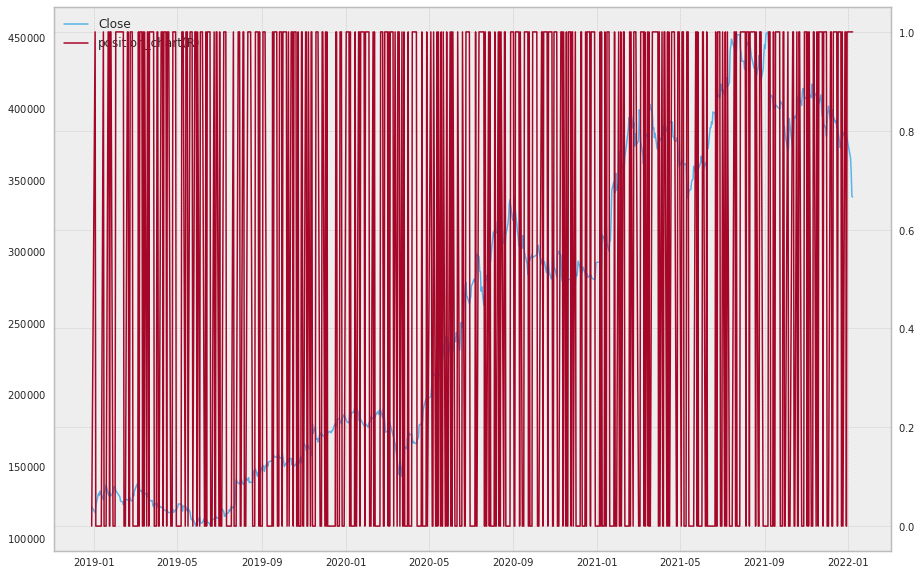

In [ ]:
draw_chart(m2_predictions, left=['Close'], right='position_chart')

In [ ]:
# 거래비용
fs.evaluate(m2_predictions, cost=0.0023)

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,122500.0,123000.0,120500.0,121410.109375,322665,-497.585938,-0.408166,126988.043717,0.0,117488.887533,...,0.5036,zero,,0,1.000000,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-02,121000.0,122000.0,117000.0,117429.453125,356120,-3980.656250,-3.278686,126763.854617,0.0,116900.403195,...,0.5146,buy,zl,1,1.000000,1.000000,1.000000,0.00,1.0000,0.9878
2019-01-03,120000.0,125000.0,119000.0,121410.109375,525020,3980.656250,3.389828,126355.017945,0.0,116944.258617,...,0.5132,zero,lz,0,0.989455,0.989455,0.989455,-1.05,0.9895,0.9796
2019-01-04,123500.0,126000.0,122500.0,124893.195312,520785,3483.085938,2.868860,126666.244187,0.0,116864.494875,...,0.5070,zero,zz,0,1.000000,1.000000,0.989455,-1.05,0.9895,1.0000
2019-01-07,128000.0,132500.0,127000.0,130864.179688,502619,5970.984375,4.780872,128354.564154,1.0,115855.855377,...,0.5277,zero,zz,0,1.000000,1.000000,0.989455,-1.05,0.9895,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,381000.0,382000.0,376000.0,378500.000000,369314,-3500.000000,-0.916230,401696.788580,0.0,370426.889545,...,0.5486,buy,zl,1,1.000000,1.000000,0.182656,-81.73,0.1827,0.8283
2022-01-04,376000.0,376000.0,365000.0,365500.000000,803676,-13000.000000,-3.434610,400653.122801,0.0,367873.980324,...,0.5535,buy,ll,1,1.000000,0.986877,0.180259,-81.97,0.1803,0.8174
2022-01-05,362000.0,362000.0,352000.0,355000.000000,1151703,-10500.000000,-2.872777,402839.828155,0.0,362039.371845,...,0.5539,buy,ll,1,1.000000,0.962766,0.173547,-82.65,0.1735,0.7870


In [ ]:
# 무위험 수익률
fs.performance(m2_predictions, rf_rate=0.02)

CAGR: -45.16%
Accumulated return: -83.80%
Average return: -0.91%
Benchmark return : 175.92%
Number of trades: 180
Number of win: 63
Hit ratio: 35.00%
Investment period: 3.0yrs
Sharpe ratio: -1.68
MDD: -83.80%
Benchmark MDD: -26.52%


## m3

In [ ]:
m3_predictions['Label'] = m3_predictions['Label'].astype(float)

In [ ]:
m3_predictions.describe()

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,macd,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target,cluster,Label
count,745.000000,745.000000,745.000000,745.000000,7.450000e+02,745.000000,745.000000,745.000000,745.000000,745.000000,...,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,258886.577181,262618.120805,255161.073826,258202.395375,7.069085e+05,290.056785,0.161369,271649.217036,0.079195,238415.891574,...,2493.802767,2534.206293,5078.778129,-48.524172,0.475168,0.476510,0.475168,0.475168,2.511409,0.492617
std,110425.850698,111610.206430,108929.771516,110107.646171,4.318606e+05,5914.236154,2.222680,116321.792637,0.270224,104267.900627,...,6211.088763,5875.050426,15649.742754,28.856411,0.499718,0.499783,0.499718,0.499718,2.621292,0.500281
min,109000.000000,110000.000000,106500.000000,107975.390625,1.514790e+05,-34953.468750,-7.874012,114545.174333,0.000000,105192.832148,...,-13443.211864,-11294.492179,-34388.235294,-107.703854,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,152000.000000,155500.000000,150500.000000,152260.218750,4.121000e+05,-2985.484375,-1.112876,159303.340142,0.000000,140444.055591,...,-1719.430169,-1738.927781,-4791.176471,-75.374823,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,274000.000000,279500.000000,270500.000000,275238.843750,5.691620e+05,0.000000,0.000000,290226.445934,0.000000,229729.654696,...,1671.724538,1496.691426,3458.823529,-44.348235,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,373000.000000,378500.000000,368000.000000,371505.625000,9.075070e+05,2985.500000,1.273886,398206.260875,0.000000,342811.854830,...,5968.315722,5418.209267,12258.823529,-23.378229,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000
max,460000.000000,465000.000000,452000.000000,453396.625000,3.303950e+06,32456.812500,13.924050,462693.098960,1.000000,426627.764037,...,20849.541154,19096.461388,54120.588235,-1.295801,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000


In [ ]:
#label 1일때 사고 0일 때 팔고
fs.indicator_to_signal(m3_predictions,factor='Label', buy=0.5, sell=0.5)

Date
2018-12-28     buy
2019-01-02    zero
2019-01-03     buy
2019-01-04     buy
2019-01-07     buy
              ... 
2021-12-30    zero
2022-01-04    zero
2022-01-05    zero
2022-01-06    zero
2022-01-07    zero
Name: trade, Length: 745, dtype: object

In [ ]:
fs.position(m3_predictions)

Date
2018-12-28      
2019-01-02    lz
2019-01-03    zl
2019-01-04    ll
2019-01-07    ll
              ..
2021-12-30    lz
2022-01-04    zz
2022-01-05    zz
2022-01-06    zz
2022-01-07    zz
Name: position, Length: 745, dtype: object

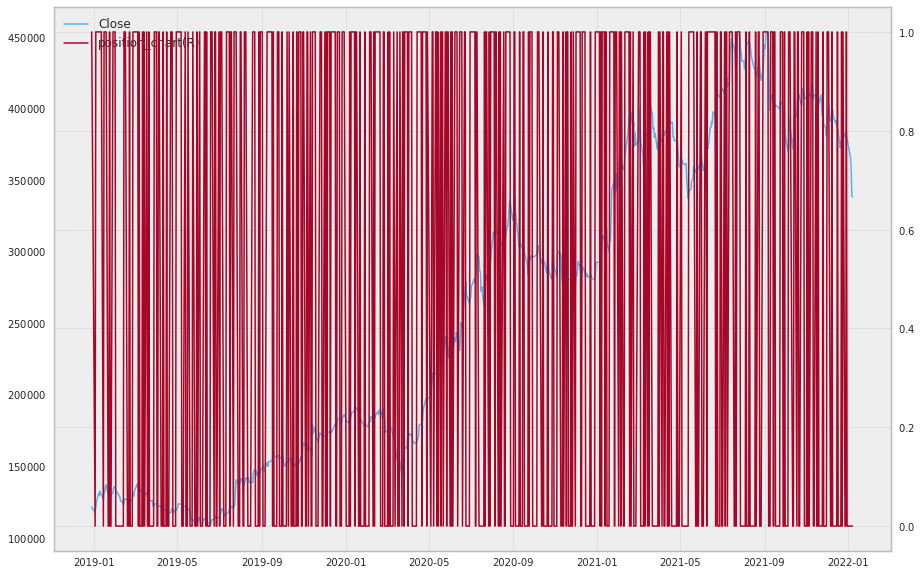

In [ ]:
draw_chart(m3_predictions, left=['Close'], right='position_chart')

In [ ]:
# 거래비용
fs.evaluate(m3_predictions, cost=0.0023)

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,Label,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,122500.0,123000.0,120500.0,121410.109375,322665,-497.585938,-0.408166,126988.043717,0.0,117488.887533,...,1.0,buy,,1,1.000000,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-02,121000.0,122000.0,117000.0,117429.453125,356120,-3980.656250,-3.278686,126763.854617,0.0,116900.403195,...,0.0,zero,lz,0,1.000000,1.000000,1.000000,0.00,1.0000,0.9878
2019-01-03,120000.0,125000.0,119000.0,121410.109375,525020,3980.656250,3.389828,126355.017945,0.0,116944.258617,...,1.0,buy,zl,1,1.000000,1.000000,1.000000,0.00,1.0000,0.9796
2019-01-04,123500.0,126000.0,122500.0,124893.195312,520785,3483.085938,2.868860,126666.244187,0.0,116864.494875,...,1.0,buy,ll,1,1.000000,1.029167,1.029167,2.92,1.0000,1.0000
2019-01-07,128000.0,132500.0,127000.0,130864.179688,502619,5970.984375,4.780872,128354.564154,1.0,115855.855377,...,1.0,buy,ll,1,1.000000,1.036437,1.066667,6.67,1.0000,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,381000.0,382000.0,376000.0,378500.000000,369314,-3500.000000,-0.916230,401696.788580,0.0,370426.889545,...,0.0,zero,lz,0,0.977182,0.977182,8.339404,733.94,0.9772,0.8283
2022-01-04,376000.0,376000.0,365000.0,365500.000000,803676,-13000.000000,-3.434610,400653.122801,0.0,367873.980324,...,0.0,zero,zz,0,1.000000,1.000000,8.339404,733.94,0.9772,0.8174
2022-01-05,362000.0,362000.0,352000.0,355000.000000,1151703,-10500.000000,-2.872777,402839.828155,0.0,362039.371845,...,0.0,zero,zz,0,1.000000,1.000000,8.339404,733.94,0.9772,0.7870


In [ ]:
# 무위험 수익률
fs.performance(m3_predictions, rf_rate=0.02)

CAGR: 101.37%
Accumulated return: 733.94%
Average return: 1.25%
Benchmark return : 175.92%
Number of trades: 179
Number of win: 113
Hit ratio: 63.13%
Investment period: 3.0yrs
Sharpe ratio: 2.89
MDD: -30.15%
Benchmark MDD: -26.52%
